##  Task 1: Import libraries and packages

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  
from sklearn.feature_selection import SelectFromModel, RFECV

### Load Data

In [2]:
# load training data
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [3]:
# load test data 
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


## Task 2: Regression Modelling Algorithms

__Dự đoán thời gian xảy ra lỗi của động cơ (TTF)__

Cả hai mô hình hồi quy tuyến tính (linear) và phi tuyến tính (non-linear) đều được thử để dự đoán TTF của động cơ. Machine
learning algorithms đã được thử và các chỉ số hiệu suất của chúng được tính toán và đánh giá: Linear Regression, LASSO Regression, Ridge Regression, Decision Tree Regression, Polynomial Regression, Random Forests Regression. Định nghĩa ngắn gọn về các thuật toán này:

    
   -  Linear Regression: phương pháp phân tích thống kê ước tính mối quan hệ giữa một hoặc nhiều
các biến độc lập và một biến phụ thuộc; phương pháp ước tính mối quan hệ bằng cách giảm thiểu
tổng bình phương chênh lệch giữa các giá trị được quan sát và dự đoán của giá trị phụ thuộc
biến được định cấu hình là một đường thẳng hoặc siêu phẳng.

-  LASSO: (Least Absolute Shrinkage and Selection Operator) (Toán tử Lựa chọn và Thu nhỏ Tuyệt đối Ít nhất) là một phiên bản chính quy của bình phương nhỏ nhất hồi quy. Nó giảm thiểu tổng sai số bình phương đồng thời xử phạt tiêu chuẩn L1 (tổng của tuyệt đối giá trị) của các hệ số.


-  Ridge Regression là một kỹ thuật để phân tích nhiều dữ liệu hồi quy bị đa cộng tuyến. Bằng cách thêm một mức độ chệch cho các ước tính hồi quy, làm giảm sai số tiêu chuẩn.


-  Polynomial Regression là một dạng phân tích hồi quy trong đó mối quan hệ giữa các biến x và biến phụ thuộc y được mô hình hóa dưới dạng đa thức bậc n trong x.


-  Decision Tree học theo kiểu phân cấp bằng cách liên tục tách tập dữ liệu thành các nhánh riêng biệt tối đa hóa thông tin thu được của mỗi lần phân chia. Trong cây hồi quy, giá trị thu được bởi các nút đầu cuối trong dữ liệu đào tạo là phản ứng trung bình của quan sát rơi vào vùng đó, trong khi trong phân loại cây, giá trị (lớp) thu được bởi nút đầu cuối trong dữ liệu huấn luyện là chế độ quan sát giảm trong khu vực đó


-  Random Forests là một phương pháp học tập tổng hợp để phân loại, hồi quy và các nhiệm vụ khác, hoạt động bằng cách xây dựng vô số cây quyết định tại thời điểm đào tạo và xuất ra lớpchế độ của các lớp (phân loại) hoặc dự đoán trung bình (hồi quy) của các cây riêng lẻ.

In [32]:
# Chuẩn bị data cho regression model

# features ban đầu
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5',
                 's6','s7','s8','s9','s10','s11','s12','s13','s14','s15',
                 's16','s17','s18','s19','s20','s21']

# fetures ban đầu  + extracted fetures
features_adxf = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 
                 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 
                 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 
                 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 
                 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 
                 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 
                 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 
                 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 
                 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

# features có mối tương quan thấp hoặc không có regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 
                  'setting1', 'setting2']

# features có mối tương quan với regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

#  Biến để giữ tập hợp các features để thử nghiệm.
features = features_orig


X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']

In [36]:
# Tạo function tính regression metrics
def get_regression_metrics(model, actual, predicted):
    
    """Tính regression metrics.
    
        model (str):  model name identifier
        actual (series): chứa các test label values
        predicted (series): Chứa các giá trị dự đoán (predicted values)
        
    Returns:
        dataframe: Các chỉ số được kết hợp trong dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [43]:
# Tạo function vẽ oefficients weights hoặc feature importance
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Vẽ regression coefficients weights hoặc feature importance.
    
    Args:
        model (str):  model name identifier
        weights (array): chứa regression coefficients weights hoặc feature importance
        feature_names (list): chứa corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        Vẽ regression coefficients weights hoặc feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None

In [48]:
# Tạo function vẽ regression residuals
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """In regression residuals.
    
    Args:
        model (str): model name identifier
        y_train (series): training labels
        y_train_pred (series): Dự đoán về training data
        y_test (series): test labels
        y_test_pred (series): Dự đoán test data
        
    Returns:
        Vẽ regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

Sử dụng các hàm trên, chúng ta hãy lập mô hình và đánh giá một số thuật toán hồi quy

### Task 2.1.Linear regression

In [51]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


,Linear Regression
Root Mean Squared Error,32.041095
Mean Absolute Error,25.591780
R^2,0.405495
Explained Variance,0.665297


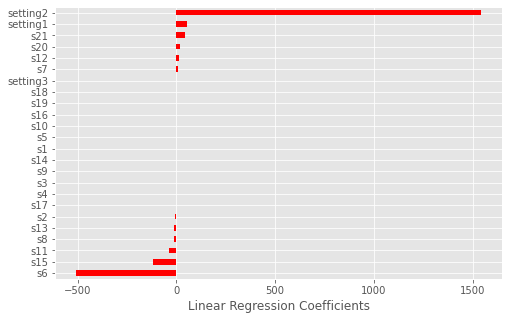

In [53]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

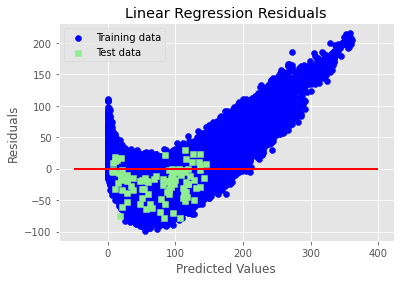

In [56]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)

### Task 2.2. LASSO

In [59]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics

R^2 training: 0.579, R^2 test: 0.408


,LASSO
Root Mean Squared Error,31.966099
Mean Absolute Error,25.551808
R^2,0.408275
Explained Variance,0.668206


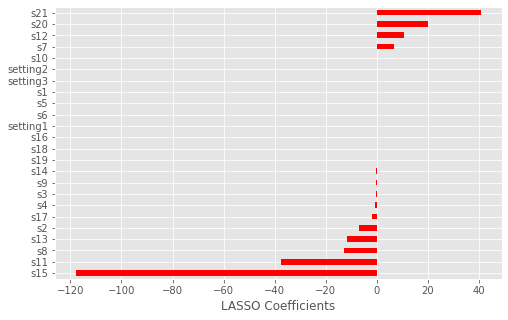

In [62]:
plot_features_weights('LASSO', lasso.coef_, X_train.columns, 'c')

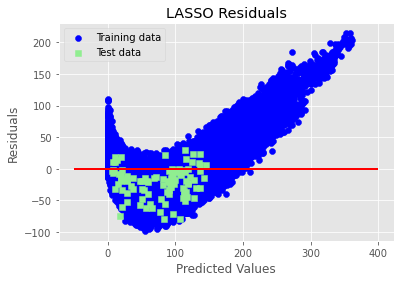

In [67]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)

### Task 2.3.Ridge Regression

In [71]:
rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.580, R^2 test: 0.408


,Ridge Regression
Root Mean Squared Error,31.965740
Mean Absolute Error,25.544620
R^2,0.408289
Explained Variance,0.667607


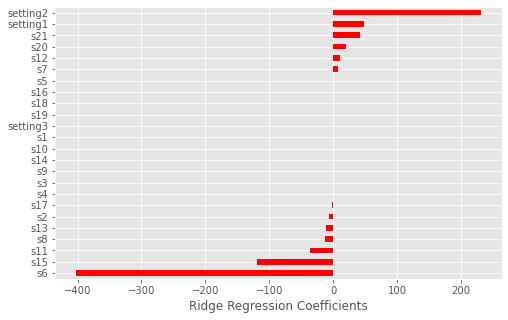

In [72]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')

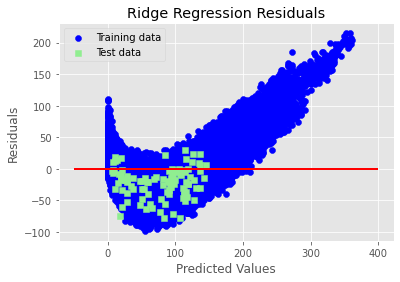

In [73]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)

### Task 2.4.Polynomial Regression

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 0.626, R^2 test: 0.383


,Polynomial Regression
Root Mean Squared Error,32.634337
Mean Absolute Error,24.968125
R^2,0.383277
Explained Variance,0.642046


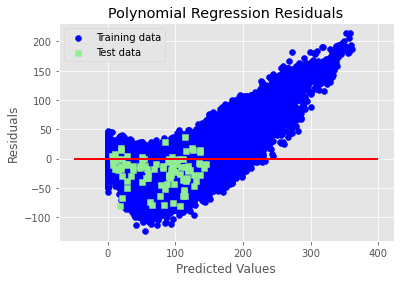

In [77]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)

__Polynomial Regression đạt điểm cao hơn linear models__

### Task 2.5.Decision Tree Regression

In [82]:
dtrg = DecisionTreeRegressor(max_depth=7, random_state=123)
dtrg.fit(X_train, y_train)

y_test_predict = dtrg.predict(X_test)
y_train_predict = dtrg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

dtrg_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)
dtrg_metrics

R^2 training: 0.625, R^2 test: 0.403


,Decision Tree Regression
Root Mean Squared Error,32.095349
Mean Absolute Error,24.319068
R^2,0.403480
Explained Variance,0.632767


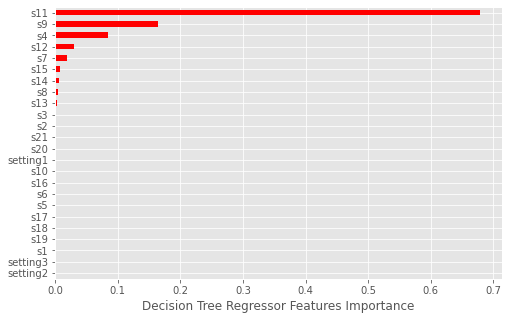

In [83]:
plot_features_weights('Decision Tree Regressor', dtrg.feature_importances_, X_train.columns, 't' )

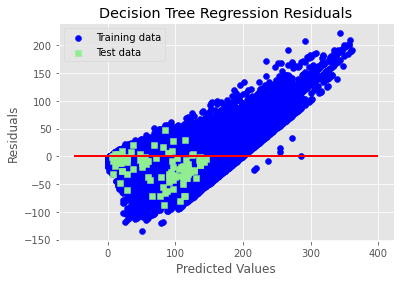

In [84]:
plot_residual('Decision Tree Regression', y_train_predict, y_train, y_test_predict, y_test)

In [29]:
# # Xây dựng Decision tree
# import graphviz
# # from .dot import Graph, Digraph
# # from .files import Source
# # from .lang import escape, nohtml
# # from . import backend
# # from . import files
# # from . import lang

# import networkx as nx
# import pylab as plt
# from networkx.drawing.nx_agraph import graphviz_layout

# export_graphviz(dtrg, out_file="./fig/mytree.dot", feature_names=X_train.columns)
# with open("./fig/mytree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [97]:
# # Loại bỏ feature  recursive 

# kfold = model_selection.KFold(n_splits=5, random_state=10)

# dtrg = DecisionTreeRegressor(max_depth=7)

# rfecv = RFECV(estimator=dtrg, step=1, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
# rfecv.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)

# sel_features = [f for f,s in zip(X_train.columns, rfecv.support_) if s]
# print('The selected features are: {}'.format(sel_features))

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected (RFE)")
# plt.ylabel("Cross validation score (mse)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [99]:
# X_train_trn = rfecv.transform(X_train)
# X_test_trn = rfecv.transform(X_test)

# print(X_train.shape)

# dtrg = DecisionTreeRegressor(max_depth=7)

# dtrg.fit(X_train_trn, y_train)

# y_test_predict = dtrg.predict(X_test_trn)

# dtrg_fs_metrics = get_regression_metrics('Decision Tree: Selected Features', y_test, y_test_predict)

# #combine decision tree results: All features and selected features
# dtr_metrics = pd.concat([dtrg_fs_metrics,dtrg_metrics], axis=1)

# dtr_metrics

NameError: name 'rfecv' is not defined

### Task 2.6.Random Forest

In [100]:
#rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=4, n_jobs=-1, random_state=1) # selected features
rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1) # original features
#rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted 

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.594, R^2 test: 0.525


,Random Forest Regression
Root Mean Squared Error,28.634253
Mean Absolute Error,23.167130
R^2,0.525198
Explained Variance,0.767320


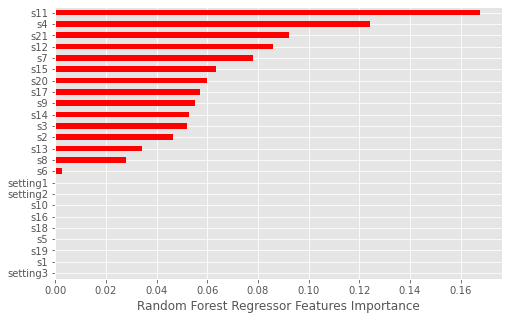

In [101]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns, 't' )

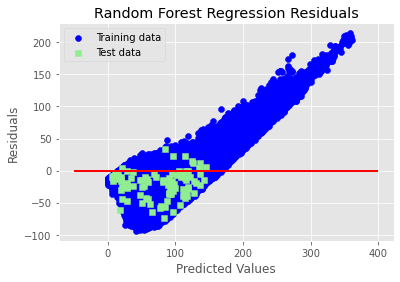

In [102]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)

phần dư hồi quy không được trải rộng ngẫu nhiên trên giá trị trung bình của phần dư. Điều này có thể được cải thiện bằng cách sửa dữ liệu (ví dụ: ngoại lệ, lấy mẫu lại) hoặc điều chỉnh thông số mô hình.

### Task 2.7.So sánh mô hình hồi quy

In [103]:
reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, dtrg_metrics, polyreg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

,Linear Regression,LASSO,Ridge Regression,Decision Tree Regression,Polynomial Regression,Random Forest Regression
Root Mean Squared Error,32.041095,31.966099,31.965740,32.095349,32.634337,28.634253
Mean Absolute Error,25.591780,25.551808,25.544620,24.319068,24.968125,23.167130
R^2,0.405495,0.408275,0.408289,0.403480,0.383277,0.525198
Explained Variance,0.665297,0.668206,0.667607,0.632767,0.642046,0.767320
